In [1]:
# Neural Network class definitions
import numpy
import scipy.special

class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        # set the number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Weights - Heart of the Neural Network
        # link Weight matrices, 
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        # Get weight sample from a normal probability distribution centered around zero with standard deviation that is
        # related to the number of incoming links into a node. 1/root(number of incoming links)
        
        # wih = Weight to apply for values moving from input to output layers
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        # who = Weight to apply for values moving from hidden layer to output layer
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the network
    def train(self, inputs_list, targets_list):
        # 1. Work out for a given training example
        # 2. Take calculated example from (1); compare it to desired output, and use the difference 
        # to guide the updating of network weights
        
        # convert input list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # Calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # Calculate signals coming out of hidden layer (sigmoid application)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Calculate signals into the output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # Calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # Calculate the back-propagation errors for the hidden layer nodes.
        # we split the errors according to the connected weights, and recombine them for each 
        # hidden layer node.
        # mathematically this (errors of hidden = weights of hidden output * errors from output layer)
        # This effectively gives us what we need to refine the weights at each layer. 
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        print(numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs)))
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
                                        numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the hidden and output layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), 
                                        numpy.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, input_list):
        # convert input list into a sd array
        inputs = numpy.array(input_list, ndmin=2).T
        # print(inputs)
        # print(input_list)
        # print(self.wih)
        
        # takes the input to a neural network and returns the network's output
        # pass input signal from the input layer of nodes, through hidden and the output layer. Using the link Weight to 
        # to moderate the signals as they feed into any given node (output or hidden)
        
        # calculate signals into the hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate signal emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [2]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of the neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [3]:
training_data_file = open("NeuralNetwork/mnist_train_100.csv")
training_data_list = training_data_file.readlines()
training_data_file.close()
if training_data_list.__len__() > 100:
    training_data_list = training_data_list[:100]

In [4]:
# train the neural network
# go through all records in the training data set
for record in training_data_list:
    # split the record into array on ','
    all_values = record.split(',')

    # scale scale and shift the input - so as to keep them in the comfort zone 
    # of the node activation function
    # As each value is an color array value of 0-255 array, we will try and bring
    # them down into the range 0.01 to  1.00.
    # Divide by 255 to bring to 0-1 range
    # Multiply by 0.99 to bring to 0.0-0.9 range
    # Add 0.01 to shift to the desired range of 0.01 -  1.00
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    
    # all_values[0] is the target label for this record -> the first row contain the target label value 
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

[[-0.00745898 -0.01174476 -0.04998501 -0.06035962 -0.02032437 -0.08636905
  -0.0478302  -0.04418232 -0.07271448 -0.04373164 -0.03190358 -0.07715446
  -0.05181996 -0.07459079 -0.03291946 -0.06327843 -0.06173375 -0.0757159
  -0.02824232 -0.07465716 -0.03905479 -0.08618716 -0.05568531 -0.05356595
  -0.05836871 -0.06220073 -0.03440418 -0.08894959 -0.07620364 -0.01766912
  -0.07000479 -0.05508989 -0.06344055 -0.02028569 -0.07803595 -0.06770057
  -0.08925742 -0.04165164 -0.04191383 -0.01861462 -0.02441038 -0.05639157
  -0.04387126 -0.01954098 -0.08095067 -0.06143445 -0.00495147 -0.04096241
  -0.0250367  -0.03776258 -0.00993402 -0.08941155 -0.0429309  -0.0578222
  -0.0209824  -0.07024452 -0.0341885  -0.02388252 -0.00983241 -0.02779882
  -0.05396983 -0.0431242  -0.06119628 -0.06346112 -0.07652293 -0.06389707
  -0.09014831 -0.01362344 -0.05896184 -0.03891505 -0.0442366  -0.04204106
  -0.03926288 -0.0450631  -0.06588911 -0.06494668 -0.06856707 -0.08836194
  -0.04250768 -0.02054682 -0.0107913  -0

[[ -6.66186204e-04  -2.64522476e-04  -1.92834624e-03  -2.05004605e-03
   -1.34065389e-04  -1.93872484e-04  -4.41411681e-05  -6.42805354e-04
   -2.01589508e-03  -2.86537224e-04  -2.25843065e-05  -1.92023002e-04
   -7.12729331e-05  -4.35420167e-04  -9.56654943e-05  -1.76538610e-04
   -1.55451620e-03  -4.82017688e-04  -2.04171296e-03  -1.72646761e-03
   -1.96807866e-03  -3.25357433e-04  -5.56338550e-05  -8.29746168e-05
   -1.95088032e-03  -2.25593125e-03  -1.01631916e-03  -2.02572179e-03
   -2.52096707e-04  -4.87968899e-04  -3.30061639e-05  -2.05284875e-03
   -2.19703092e-03  -2.20851329e-03  -1.23169837e-04  -2.21216849e-03
   -1.96609756e-03  -9.21421442e-04  -1.44602579e-03  -1.91834410e-03
   -1.44391366e-03  -4.78286006e-04  -2.21303024e-04  -1.83933342e-03
   -9.07829942e-05  -9.00860938e-04  -5.41131300e-04  -1.72251351e-03
   -5.13428778e-04  -2.14443478e-03  -2.51899810e-04  -2.84633293e-04
   -1.25129962e-03  -6.22470656e-04  -3.22765874e-04  -1.59940384e-03
   -1.00770161e-03  

[[ -2.06768613e-06  -6.57664537e-07  -2.44794542e-06  -1.36839257e-06
   -4.41190655e-07  -3.02395251e-07  -1.49530888e-07  -4.92377963e-07
   -2.36172768e-06  -7.87085112e-07  -3.11766733e-07  -1.77481102e-06
   -2.24536643e-07  -4.52389746e-07  -3.31183002e-07  -4.46001432e-07
   -6.61158451e-07  -6.38099681e-07  -2.26104772e-06  -1.51194409e-06
   -1.40185680e-06  -8.69034657e-07  -1.31537076e-07  -3.25199643e-07
   -4.79075147e-07  -2.46976719e-06  -1.69686139e-06  -2.47104708e-06
   -1.12613059e-06  -6.16053589e-07  -5.93971637e-07  -2.33302078e-06
   -2.21273097e-06  -9.30182093e-07  -5.55259571e-07  -2.16687717e-06
   -1.83876856e-06  -1.52395074e-06  -2.15460645e-06  -5.24130879e-07
   -2.20960046e-06  -3.21205831e-07  -4.25071529e-07  -1.54689390e-06
   -1.75201210e-06  -1.49483841e-06  -1.11991496e-06  -2.40479345e-06
   -3.99337957e-07  -2.23177976e-06  -2.06356000e-06  -2.62491607e-07
   -1.01402478e-06  -1.85918089e-07  -9.14661414e-07  -3.00483952e-07
   -1.55926695e-06  

[[ -1.52723495e-03  -8.71517311e-04  -1.40048380e-04  -1.51346817e-03
   -1.37987253e-04  -2.56596113e-05  -5.79976268e-06  -4.13300400e-05
   -1.49166056e-03  -1.82393324e-04  -2.25187945e-05  -1.07448488e-03
   -3.77381648e-05  -3.75089745e-04  -7.12151773e-05  -3.55041999e-04
   -4.52654041e-04  -2.14869780e-04  -3.52215583e-04  -1.15442656e-03
   -7.39468647e-04  -6.92907177e-05  -2.06716852e-05  -3.13479290e-05
   -5.33225485e-04  -1.55389386e-03  -2.61826107e-05  -1.25507455e-03
   -2.30330354e-05  -5.48964727e-05  -1.26428051e-04  -1.53828243e-03
   -1.40166474e-03  -1.45681156e-03  -8.81751710e-05  -1.37268406e-03
   -5.92351503e-04  -7.52604523e-04  -5.99178904e-04  -7.40767366e-04
   -1.37112322e-03  -2.66966208e-05  -3.82092009e-04  -1.36367315e-03
   -1.68759244e-05  -5.68143376e-04  -4.10128479e-04  -1.30810504e-03
   -4.65762148e-04  -7.76092296e-04  -2.41091030e-05  -8.83968122e-04
   -3.09783570e-04  -6.34864321e-04  -1.48608363e-04  -9.67929239e-05
   -1.64238949e-04  

[[ -3.90016008e-06  -1.17790098e-05  -1.24618592e-05  -1.09111843e-05
   -2.45444007e-06  -3.77953013e-07  -1.65614648e-06  -9.00460526e-07
   -5.85054401e-06  -4.27827416e-07  -6.84270678e-07  -5.97961771e-06
   -3.12381909e-06  -6.01861061e-06  -8.60829614e-07  -1.49133882e-06
   -2.71971828e-06  -8.21757212e-07  -6.80725094e-06  -9.73258597e-06
   -6.10634373e-06  -6.49243495e-07  -3.48855945e-07  -2.89273656e-06
   -1.65141873e-06  -1.46791001e-05  -5.91292425e-06  -8.93457707e-06
   -8.00129750e-07  -6.58582837e-07  -3.47012816e-06  -1.50843034e-05
   -1.49418573e-05  -6.40553375e-06  -7.53098486e-07  -1.35827128e-05
   -3.86555850e-06  -5.25261695e-06  -3.63373895e-06  -1.75322354e-06
   -3.19106074e-06  -3.30327598e-06  -2.81166997e-06  -5.54803931e-06
   -1.07568473e-05  -4.61515910e-06  -1.10593675e-06  -1.17079929e-05
   -2.33438209e-06  -6.92202546e-06  -4.23285568e-06  -1.33685036e-05
   -1.90101529e-06  -1.20720264e-06  -8.39646856e-06  -1.00927762e-05
   -3.96409224e-06  

[[ -3.97631130e-04  -1.17033219e-04  -1.03209355e-04  -4.23073591e-04
   -1.77387142e-05  -4.67002200e-05  -4.52126433e-06  -1.18263458e-04
   -4.57429505e-04  -2.57067396e-06  -2.35943289e-06  -1.19872144e-05
   -1.15317064e-05  -3.45588566e-04  -8.04041890e-05  -2.15658574e-04
   -4.21239164e-04  -5.21837861e-05  -1.17595647e-04  -3.90475716e-04
   -8.71087500e-05  -9.76288228e-05  -6.85754985e-06  -1.47328928e-05
   -4.91804574e-05  -4.43871971e-04  -1.23419289e-05  -2.96807876e-04
   -5.65196760e-05  -3.66923264e-05  -2.13489091e-06  -4.53862018e-04
   -4.26105585e-04  -4.33061640e-04  -3.74763395e-05  -3.86735199e-04
   -1.43046444e-05  -3.74277711e-04  -1.01155813e-04  -2.07417723e-04
   -2.66229238e-04  -1.48949471e-05  -7.68444347e-05  -3.74920618e-04
   -2.15273704e-06  -3.99081279e-04  -4.57522126e-04  -3.01262160e-05
   -1.41832491e-05  -1.48104712e-05  -8.68215739e-06  -1.89979226e-04
   -3.94045463e-04  -2.47824035e-05  -3.27417788e-05  -2.62442376e-04
   -6.55906500e-06  

In [5]:
# Lets test the network
# lat the mnist test data csv
test_date_file = open('NeuralNetwork/mnist_test_10.csv', 'r')
test_data_list = test_date_file.readlines()
test_date_file.close()

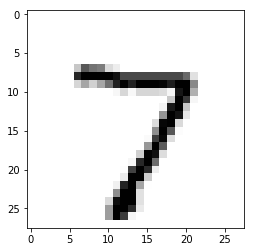

In [8]:
import matplotlib.pyplot
%matplotlib inline
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
# print(all_values)
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [9]:
n.query(numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

array([[ 0.07107857],
       [ 0.02261415],
       [ 0.05045133],
       [ 0.08434941],
       [ 0.08420955],
       [ 0.02646527],
       [ 0.0187883 ],
       [ 0.80045601],
       [ 0.06628003],
       [ 0.03696357]])

In [ ]:
# Test the neu